# Program Face Recognation

## 1. Import libraries

In [4]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

## 2. Membuka foto

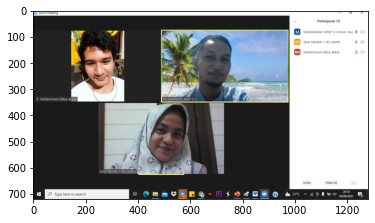

In [3]:
img=cv2.imread('13.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

## 3. Membaca Ekspresi muka dengan menggunakan package deepface

In [6]:
prediction= DeepFace.analyze(img)
prediction

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.40it/s]


{'emotion': {'angry': 1.1039418826366594,
  'disgust': 4.495992291105586e-07,
  'fear': 0.005713579934713538,
  'happy': 95.50714466018347,
  'sad': 0.02240984019285978,
  'surprise': 0.005078735132738062,
  'neutral': 3.355710780960964},
 'dominant_emotion': 'happy',
 'region': {'x': 431, 'y': 398, 'w': 174, 'h': 174},
 'age': 23,
 'gender': 'Man',
 'race': {'asian': 26.26074709062261,
  'indian': 13.029942693110865,
  'black': 5.0047106298631805,
  'white': 11.162581215058637,
  'middle eastern': 9.18440873529963,
  'latino hispanic': 35.35760851845792},
 'dominant_race': 'latino hispanic'}

## 4. Mendetek wajah lalu menampilkan garis persegi

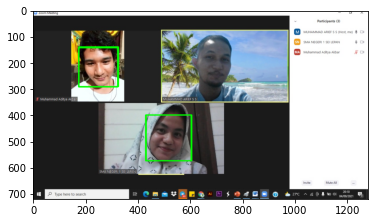

In [9]:
cascade_wajah= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces= cascade_wajah.detectMultiScale(gray,1.3,3)

for x,y,w,h in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h), (0,255,0),3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

## 5. Menampilkan tulisan hasil membaca wajah 

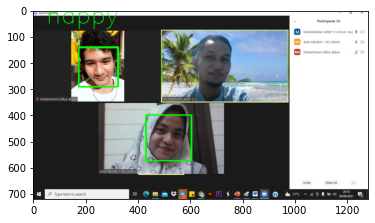

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           prediction['dominant_emotion'],
           (50,50),
           font,3,
           (0,255,0),
           2,
           cv2.LINE_4);
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

## 6. Menjalankan program face recognation pada camera

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
cascade_wajah= cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cam=cv2.VideoCapture(0)
img_counter=0




while True:
    font = cv2.FONT_HERSHEY_SIMPLEX
    ret, frame= cam.read()
    results= DeepFace.analyze(frame)
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= cascade_wajah.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h), (0,255,0),2)
        cv2.putText(frame,
           results['dominant_emotion'],
           (x,y-50),
           font,3,
           (0,0,255),
           2,
           cv2.LINE_4)
        

    cv2.imshow('Deteksi Wajah', frame)

    if cv2.waitKey(27)& 0xff== ord('x'):
        break
     
        
cam.release()
cv2.destroyAllWindows()